In [277]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import glm

#import folium # package for making maps, please make sure to use a version older than 1.0..



In [184]:
df=pd.read_csv('Final_Final.csv')
lights=pd.read_csv('lights_clean.csv')
list_df=[]
x_df=[]
y_df=[]
for i in range(df.shape[0]):
    address=str(round(df['LATITUD'].iloc[i],7))+' '+str(round(df['LONGITUD'].iloc[i],7))
    list_df.append(address)   
    
df['LAT_LON']=list_df
df['ID']=df['BUS_SUBIDA']


newdf=df[['LAT_LON','ID','BUS_SUBIDA','BUS_BAJADA','TRAFICO','POT','PIEZA_URBANA','LATITUD','LONGITUD']]

In [185]:
dff=newdf.groupby(['LAT_LON']).count().reset_index()
list_df=[]
for i in range(dff.shape[0]):
    list_df.append(np.array(newdf[newdf['LAT_LON']==dff['LAT_LON'].iloc[i]]).tolist()[0])



In [186]:
final_df = pd.DataFrame.from_records(list_df)
final_df=final_df.rename(columns={0:'LAT_LON',1:'ID',2:'BUS_SUBIDA',3:'BUS_BAJADA',4:'TRAFICO',5:'POT',6:'PIEZA_URBANA',7:'LATITUD',8:'LONGITUD'})
final_df['ID']=dff['ID']
final

In [316]:
closest=np.zeros(final_df.shape[0])
numclose=np.zeros(final_df.shape[0])
for i in range(final_df.shape[0]):
    corner_lat=final_df['LATITUD'][i]
    corner_lon=final_df['LONGITUD'][i]
    light_lat=np.array(lights['LATITUD'])
    light_lon=np.array(lights['LONGITUD'])
    dx = (light_lon-corner_lon)*40000*np.cos((light_lat+corner_lat)*math.pi/360)/360
    dy = (light_lat-corner_lat)*40000/360
    distance=np.sqrt(dx**2+dy**2)
    closest[i]=distance[distance.argmin()]
    numclose[i]=sum(distance<0.5)
final_df['NLIGHTS']=list(numclose)
final_df['CLOSEST_LIGHT']=list(closest)
data=final_df.drop(columns=['LAT_LON','LONGITUD','LATITUD'])
data=data.rename(columns={'ID':'NACCIDENTS'})

In [321]:
formula='NACCIDENTS~BUS_SUBIDA+BUS_BAJADA+TRAFICO+POT+PIEZA_URBANA+NLIGHTS+CLOSEST_LIGHT'
mod1 = glm(formula=formula, data=data, family=sm.families.Poisson()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             NACCIDENTS   No. Observations:                 6056
Model:                            GLM   Df Residuals:                     6036
Model Family:                 Poisson   Df Model:                           19
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23114.
Date:                Wed, 27 Nov 2019   Deviance:                       30477.
Time:                        09:34:20   Pearson chi2:                 6.37e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.4187      0.040     35.533      0.000       1.340       1.497
POT[T.comercial]                         0.2019      0.028      7.215      0.000       0.147       0.257
POT[T.industrial]                        0.4367      0.042     10.497      0.000       0.355       0.518
POT[T.ninguna]                          -0.0322      0.032     -1.021      0.307      -0.094       0.030
POT[T.portuaria]                        -0.3454      0.078     -4.425      0.000      -0.498      -0.192
POT[T.protegida]                         0.0028      0.043      0.065      0.948      -0.082       0.088
POT[T.residencial]                      -0.3083      0.030    -10.226      0.000      -0.367      -0.249
PIEZA_URBANA[T.centro metropolitana]    -0.1930      0.034     -5.619      0.000      -0.260      -0.126
PIEZA_URBANA[T.ninguna]                  0.0847      0.059      1.433      0.152      -0.031       0.200
PIEZA_URBANA[T.prado norte]             -0.0810      0.030     -2.740      0.006      -0.139      -0.023
PIEZA_URBANA[T.ribera occidental]        0.4302      0.039     11.168      0.000       0.355       0.506
PIEZA_URBANA[T.riomar]                   0.2521      0.025      9.910      0.000       0.202       0.302
PIEZA_URBANA[T.suroccidental 1]         -0.1048      0.035     -2.967      0.003      -0.174      -0.036
PIEZA_URBANA[T.suroccidental 2]          0.0576      0.037      1.552      0.121      -0.015       0.130
PIEZA_URBANA[T.suroriental]              0.0252      0.027      0.922      0.357      -0.028       0.079
BUS_SUBIDA                              -0.1381      0.009    -14.992      0.000      -0.156      -0.120
BUS_BAJADA                               0.0572      0.010      5.922      0.000       0.038       0.076
TRAFICO                                 -0.0750      0.036     -2.086      0.037      -0.146      -0.005
NLIGHTS                                 -0.0068      0.002     -3.428      0.001      -0.011      -0.003
CLOSEST_LIGHT                            0.0013      0.015      0.084      0.933      -0.029       0.031
========================================================================================================
"""

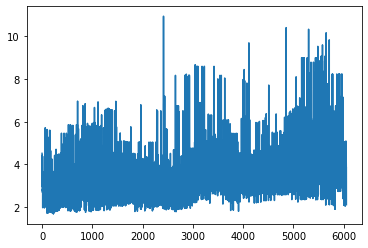

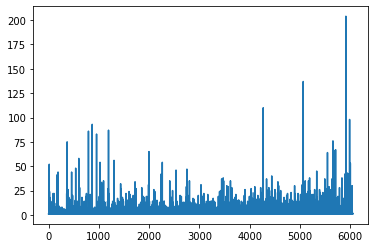

In [322]:
mod1.predict()
plt.plot(list(mod1.predict()))
plt.show()
plt.plot(data['NACCIDENTS'])
plt.show()

In [323]:
mod1.predict()

array([4.51987839, 2.98494738, 3.25152677, ..., 3.86952363, 3.87089725,
       2.1112879 ])

In [324]:
len(mod1.predict())

6056

In [325]:
len(data['NACCIDENTS'])

6056

In [289]:
np.array(mod1.predict())

array([3.90236878, 3.83745756, 3.70468465, ..., 4.48899725, 4.49626873,
       3.0656569 ])

In [313]:
aa=np.array(data['NACCIDENTS'])
aa.argmax()

5915

In [320]:
data.iloc[aa.argmax()]

NACCIDENTS                     204
BUS_SUBIDA                       0
BUS_BAJADA                       1
TRAFICO                 0.00392157
POT                      comercial
PIEZA_URBANA     ribera occidental
NLIGHTS                          0
CLOSEST_LIGHT              1.47473
Name: 5915, dtype: object

In [326]:
max(data['NLIGHTS'])

28.0